# Unit 5 - Financial Planning

In [63]:
# Initial imports
import os
import requests
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [64]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [65]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [66]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [67]:
import json
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
print(json.dumps(btc_data, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19367837,
            "total_supply": 19367837,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 27803.0,
                    "volume_24h": 20851302587,
                    "market_cap": 534997410878,
                    "percentage_change_1h": 0.623618078996316,
                    "percentage_change_24h": -2.6382839171922,
                    "percentage_change_7d": -1.14800802034967,
                    "percent_change_1h": 0.623618078996316,
                    "percent_change_24h": -2.6382839171922,
                    "percent_change_7d": -1.14800802034967
                }
            },
            "last_updated": 1683596101
        }
    },
    "metadata": {
        "timestamp": 1683596101,
        "num_crypt

In [68]:
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
print(json.dumps(eth_data, indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120323541,
            "total_supply": 120323541,
            "max_supply": 120334908,
            "quotes": {
                "USD": {
                    "price": 1858.41,
                    "volume_24h": 10664378295,
                    "market_cap": 222407004715,
                    "percentage_change_1h": 0.679047640023057,
                    "percentage_change_24h": -1.14028339637957,
                    "percentage_change_7d": 1.40114903100874,
                    "percent_change_1h": 0.679047640023057,
                    "percent_change_24h": -1.14028339637957,
                    "percent_change_7d": 1.40114903100874
                }
            },
            "last_updated": 1683596104
        }
    },
    "metadata": {
        "timestamp": 1683596104,
       

In [69]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $33363.60
The current value of your 5.3 ETH is $9849.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [70]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [76]:
# Set Alpaca API key and secret
Alpaca_API_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(Alpaca_API_Key, Alpaca_Secret_Key, api_version = "v2")
api

In [79]:
# Format current date as ISO format
today = pd.Timestamp("2023-05-08", tz = "America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
alpaca_df = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = alpaca_df[alpaca_df["symbol"] == "AGG"].drop("symbol", axis=1)
SPY = alpaca_df[alpaca_df["symbol"] == "SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
alpaca_df = pd.concat([AGG,SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
alpaca_df

AGG                                             \
                            open   high      low close   volume trade_count   
timestamp                                                                     
2023-05-08 04:00:00+00:00  99.21  99.35  99.0801  99.1  5408274       20110   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-05-08 04:00:00+00:00  99.199649  412.97  413.24  411.28  412.74   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-05-08 04:00:00+00:00  49256623      415854  412.513203

In [77]:
# Pick AGG and SPY close prices
agg_close_price = float(alpaca_df["AGG"]["close"])
spy_close_price = float(alpaca_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.1
Current SPY closing price: $412.74


In [78]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20637.00
The current value of your 200 AGG shares is $19820.00


### Savings Health Analysis

In [80]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
stock_bonds = my_spy_value + my_agg_value

savings_data = [crypto, stock_bonds]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "stock_bonds"])

# Display savings DataFrame
savings_df

,amount
crypto,43213.173
stock_bonds,40457.000


array([<Axes: ylabel='amount'>], dtype=object)

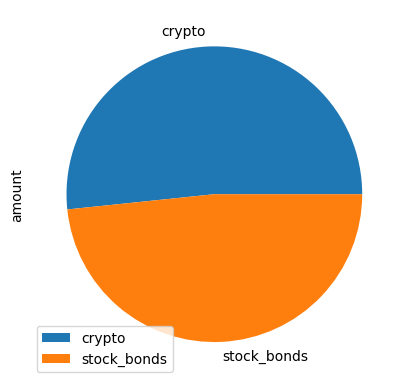

In [82]:
# Plot savings pie chart
savings_df.plot.pie(subplots=True)

In [93]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + stock_bonds

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your goal!")
else :
    print("You are $" + str(emergency_fund-total_savings) + "away from your goal.")

Congratulations! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [85]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [86]:
# Get 5 years' worth of historical data for SPY and AGG
alp_df = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY_Data = alp_df[alp_df["symbol"] == "SPY"].drop("symbol", axis =1)
AGG_Data = alp_df[alp_df["symbol"] == "AGG"].drop("symbol", axis = 1)


# Concatenate the ticker DataFrames
alp_df = pd.concat([AGG_Data,SPY_Data], axis=1, keys=["AGG", "SPY"])

# Display sample data
alp_df.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [95]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = alp_df,
    weights = [.60, .40],
    num_simulation = 100,
    num_trading_days = 252 * 30
)

In [96]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [97]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001241,0.993481,0.996006,1.001652,1.001482,0.999876,1.003058,0.991965,1.002362,0.998714,...,0.998606,0.998440,0.993491,1.002225,0.996647,0.995515,1.004468,0.998433,0.999720,1.005598
2,0.996777,0.998158,1.006049,0.997036,1.009323,1.001788,1.000363,0.999090,1.006112,0.998256,...,0.994062,0.994442,0.998866,0.988127,0.994906,1.001140,1.002057,1.001342,1.000010,1.006310
3,0.997872,1.002503,1.005453,1.000654,1.007041,1.000475,1.006918,1.002559,1.001652,0.995963,...,0.992998,0.992028,0.999020,0.982547,0.985120,1.004514,0.997990,1.003575,1.017897,1.010543
4,0.995706,1.003601,1.010493,1.001903,1.006544,0.996220,1.005156,1.000775,0.993740,0.988586,...,0.991321,0.984564,0.998482,0.987777,0.990621,0.996981,0.998902,0.999160,1.014696,1.008217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.309665,7.866629,4.416397,8.098278,4.651164,8.930037,6.053105,3.139833,6.980233,5.108588,...,16.144646,8.600048,6.515309,7.140980,7.909462,7.352971,7.727460,15.484254,4.991153,6.995542
7557,8.267849,7.840506,4.397643,8.079756,4.646776,8.925769,6.030065,3.153991,7.000413,5.138123,...,16.107105,8.530079,6.515567,7.129416,7.980313,7.318870,7.769600,15.427268,5.012682,6.961549
7558,8.226292,7.864810,4.399597,8.096318,4.656928,8.977863,6.031280,3.149877,7.027797,5.156800,...,16.168197,8.514654,6.476530,7.137527,8.052004,7.272982,7.755484,15.394055,4.993332,6.953403
7559,8.212367,7.879525,4.385473,8.128894,4.666658,8.910452,6.011524,3.180950,7.015138,5.175957,...,16.051124,8.443105,6.500335,7.174389,8.065009,7.259026,7.795234,15.405088,4.968111,7.002181


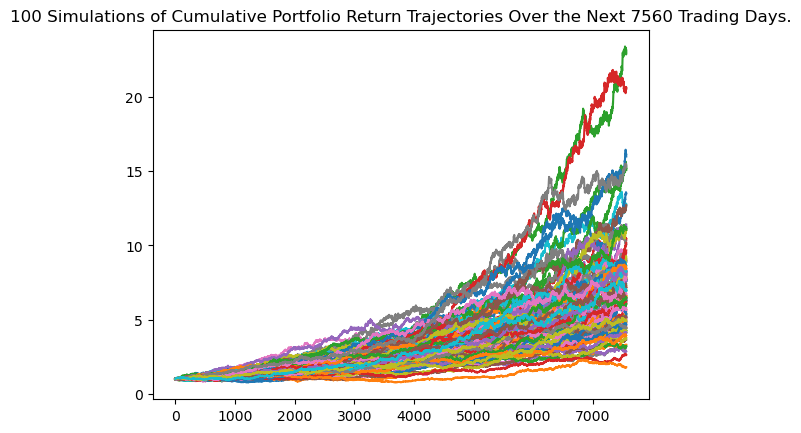

In [98]:
# Plot simulation outcomes
mc_lineplot = MC_30year.plot_simulation()

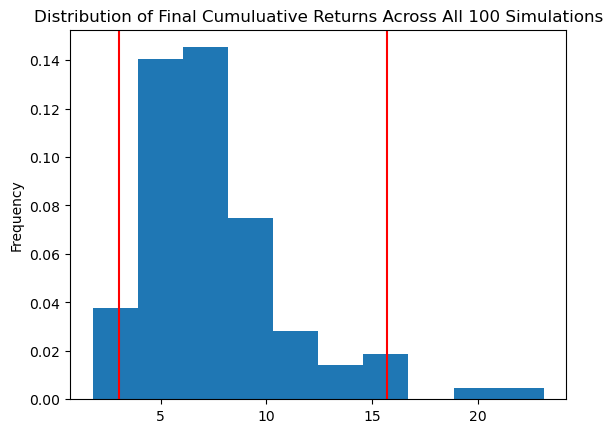

In [99]:
# Plot probability distribution and confidence intervals
mc_distplot = MC_30year.plot_distribution()

### Retirement Analysis

In [107]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(mc_tbl)

count           100.000000
mean              7.444036
std               3.560765
min               1.788609
25%               5.070187
50%               6.842053
75%               8.439032
max              23.126069
95% CI Lower      3.010968
95% CI Upper     15.693227
Name: 7560, dtype: float64


C:\Users\glzvi\OneDrive\Desktop\Homework Assignments\API_Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [108]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_tbl[8]*initial_investment,2)
ci_upper = round(mc_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60219.36 and $313864.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [109]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_tbl[8]*initial_investment,2)
ci_upper = round(mc_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90329.04 and $470796.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [110]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = alp_df,
    weights = [.60,.40],
    num_simulation = 100,
    num_trading_days = 252*5
)

In [111]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997061,1.005624,0.996661,1.003276,1.001590,1.005952,1.000384,0.999384,0.995948,1.004587,...,1.003664,0.996986,1.006072,1.005169,0.996899,1.000615,1.003481,0.998751,0.997887,1.001529
2,0.995549,1.007273,0.999351,0.997815,0.996856,1.002224,0.998199,0.998733,0.992785,1.007695,...,1.002778,0.998133,0.996346,1.017560,0.986755,0.994632,1.005553,1.001006,1.001587,0.993320
3,0.985042,1.003180,0.998178,0.991967,1.000371,1.000439,1.006847,0.999556,0.997663,0.996377,...,1.001607,0.998203,0.998269,1.019772,0.988491,0.991608,1.006211,0.999924,1.000514,0.992099
4,0.986016,1.004593,0.998668,0.994934,1.002825,1.008153,1.010692,1.004249,0.994920,0.998552,...,0.999687,0.998115,0.996511,1.020911,0.986700,0.998619,1.007716,1.003840,1.004332,0.999942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.277063,1.224363,1.119890,1.267587,1.378520,1.364415,1.377985,1.373357,1.624911,1.293824,...,1.569872,1.618705,1.353606,1.362997,1.120201,1.411144,1.235389,1.641694,1.316291,1.439531
1257,1.280551,1.241547,1.117349,1.265066,1.375510,1.360325,1.380690,1.377234,1.630122,1.299673,...,1.572489,1.625750,1.353194,1.360249,1.125780,1.410822,1.235112,1.640596,1.310899,1.442255
1258,1.283834,1.251145,1.126581,1.265226,1.366715,1.360690,1.385474,1.371872,1.617760,1.290704,...,1.571733,1.614160,1.357564,1.365220,1.134519,1.417539,1.236916,1.640093,1.310952,1.451712
1259,1.285264,1.250297,1.132729,1.266592,1.382460,1.359628,1.379389,1.377910,1.621599,1.287576,...,1.561986,1.627529,1.359147,1.352521,1.137167,1.422404,1.233610,1.637072,1.310278,1.453524


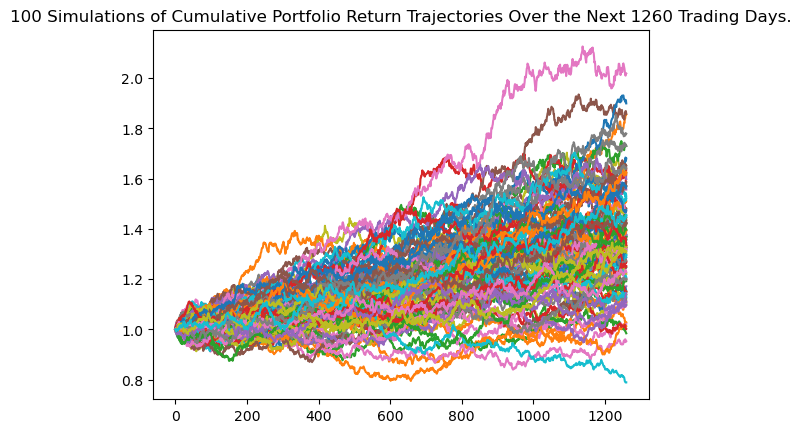

In [112]:
# Plot simulation outcomes
mc5_lplot = MC_5year.plot_simulation()

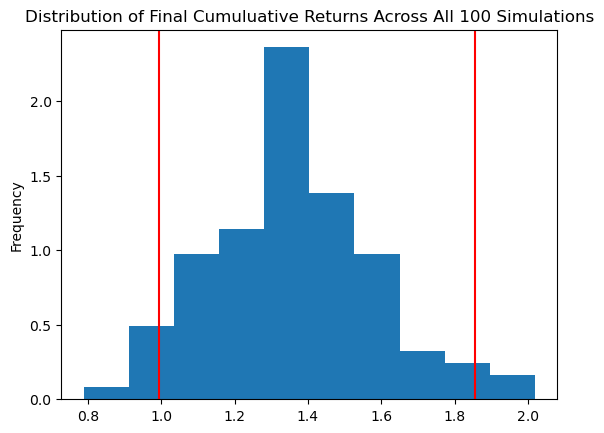

In [113]:
# Plot probability distribution and confidence intervals
mc5_distplot = MC_5year.plot_distribution()

In [114]:
# Fetch summary statistics from the Monte Carlo simulation results
mc5_tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(mc5_tbl)

count           100.000000
mean              1.365424
std               0.218813
min               0.789589
25%               1.218078
50%               1.363040
75%               1.472074
max               2.018437
95% CI Lower      0.992962
95% CI Upper      1.856492
Name: 1260, dtype: float64


C:\Users\glzvi\OneDrive\Desktop\Homework Assignments\API_Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [115]:
# Set initial investment
initial_inv = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_tbl[8]*initial_inv,2)
ci_upper_five = round(mc_tbl[9]*initial_inv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_inv} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $180658.08 and $941593.64


### Ten Years Retirement Option

In [123]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = alp_df,
    weights = [.60,.40],
    num_simulation = 100,
    num_trading_days = 252*10
)

In [124]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992507,1.002827,1.004184,0.996464,1.004933,1.008623,0.996899,0.998115,0.991699,1.004043,...,1.006555,1.000702,1.003526,1.005219,1.001101,0.996625,1.002300,0.999381,0.999526,0.996084
2,0.992614,0.997312,0.999690,0.986792,1.008561,1.013712,0.996974,0.996230,0.990424,1.000328,...,1.011243,1.003017,1.000657,1.011262,1.008048,1.003297,1.007249,1.001466,1.005752,1.003040
3,0.993356,1.002925,1.010020,0.989030,1.000859,1.030666,0.999448,0.998859,0.988693,0.996569,...,1.004664,1.007944,1.005050,1.010112,1.014249,1.000179,1.014604,1.002903,1.005294,1.003576
4,0.994398,1.001319,1.001670,0.985756,0.996849,1.028720,1.006844,0.997797,0.980013,0.994022,...,1.006358,1.005527,1.011017,1.013381,1.011211,1.000855,1.015062,1.005943,1.008084,1.003903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.012393,3.179760,1.610919,2.357021,2.612375,1.646674,0.911638,2.880195,1.824644,2.650138,...,2.694789,1.603592,2.507883,2.272129,1.524034,2.312855,2.195320,2.196164,1.253756,1.492766
2517,2.000783,3.195423,1.602911,2.340875,2.608567,1.641966,0.907397,2.885924,1.827873,2.670381,...,2.687141,1.621212,2.512329,2.297664,1.534695,2.304122,2.203427,2.178479,1.245540,1.488000
2518,1.998504,3.198588,1.605272,2.346741,2.610055,1.638381,0.900150,2.908188,1.821564,2.672484,...,2.691585,1.616038,2.517551,2.284363,1.528007,2.307684,2.217763,2.176492,1.247344,1.494080
2519,1.979600,3.198592,1.613991,2.355494,2.616898,1.639984,0.903946,2.901409,1.816780,2.675466,...,2.680807,1.599373,2.517645,2.280337,1.535590,2.320809,2.213008,2.192635,1.255480,1.494018


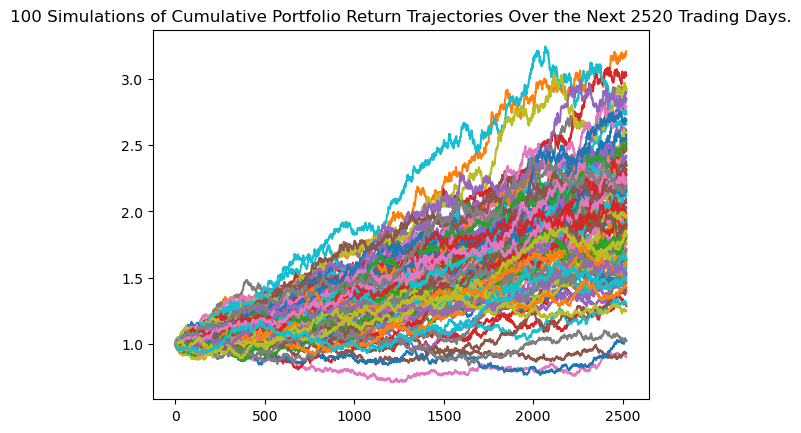

In [129]:
# Plot simulation outcomes
mc10_lplot = MC_10year.plot_simulation()

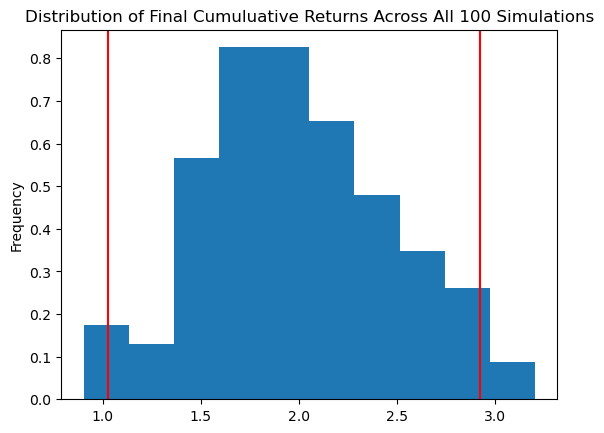

In [130]:
# Plot probability distribution and confidence intervals
mc10_distplot = MC_10year.plot_distribution()

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
mc10_tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(mc10_tbl)

count           100.000000
mean              1.995428
std               0.489983
min               0.904026
25%               1.640842
50%               1.926464
75%               2.315362
max               3.204967
95% CI Lower      1.024829
95% CI Upper      2.922792
Name: 2520, dtype: float64


C:\Users\glzvi\OneDrive\Desktop\Homework Assignments\API_Homework\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [132]:
# Set initial investment
ini_inv = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_tbl[8]*ini_inv,2)
ci_upper_ten = round(mc_tbl[9]*ini_inv,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ini_inv} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $180658.08 and $941593.64
